## A. The effect of *under-* and *over-* parameterisation in the *Teacher/Student* setup

In [94]:
from utils import load_model, MODELS_DIR, FIGURES_DIR
from partA_src import Model, get_global_params
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [93]:

students_config = {
    "StudentUnderparam": [100, 10, 1],
    "StudentEqualparam": [100, 75, 50, 10, 1],
    "StudentOverparam": [100, 200, 200, 200, 100, 1],
}

students = {}

for student_name, student_config in students_config.items():
    students[student_name] = Model(student_config)
    
models_filenames = os.listdir(MODELS_DIR)

teacher_model = Model([100, 75, 50, 10, 1])
# Teacher model parameters
teacher_model_name = next(f.rsplit('.', 1)[0] for f in models_filenames if f.startswith("teacher_model"))
teacher_model = load_model(teacher_model, teacher_model_name)

Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/teacher_model_s42.safetensors


In [33]:
def extract_lr_and_distribution(filename):
    """
    Extracts the learning rate (lr) and the distribution parameter from a filename.

    Args:
    - filename (str): The filename to process.

    Returns:
    - tuple: (lr_value (float), distribution_param (str)) if found, else (None, None)
    """
    # Regex pattern to extract learning rate and distribution parameter
    pattern = re.compile(r'lr([0-9]*\.?[0-9]+)_([a-zA-Z_]+)')
    
    match = pattern.search(filename)
    if match:
        lr_value = float(match.group(1))  # Convert LR to float
        distribution_param = match.group(2)  # Extract the distribution parameter
        return lr_value, distribution_param
    
    return None, None  # Return None if pattern is not found


Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.001_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.01_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.1_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.001_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.01_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.1_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDe

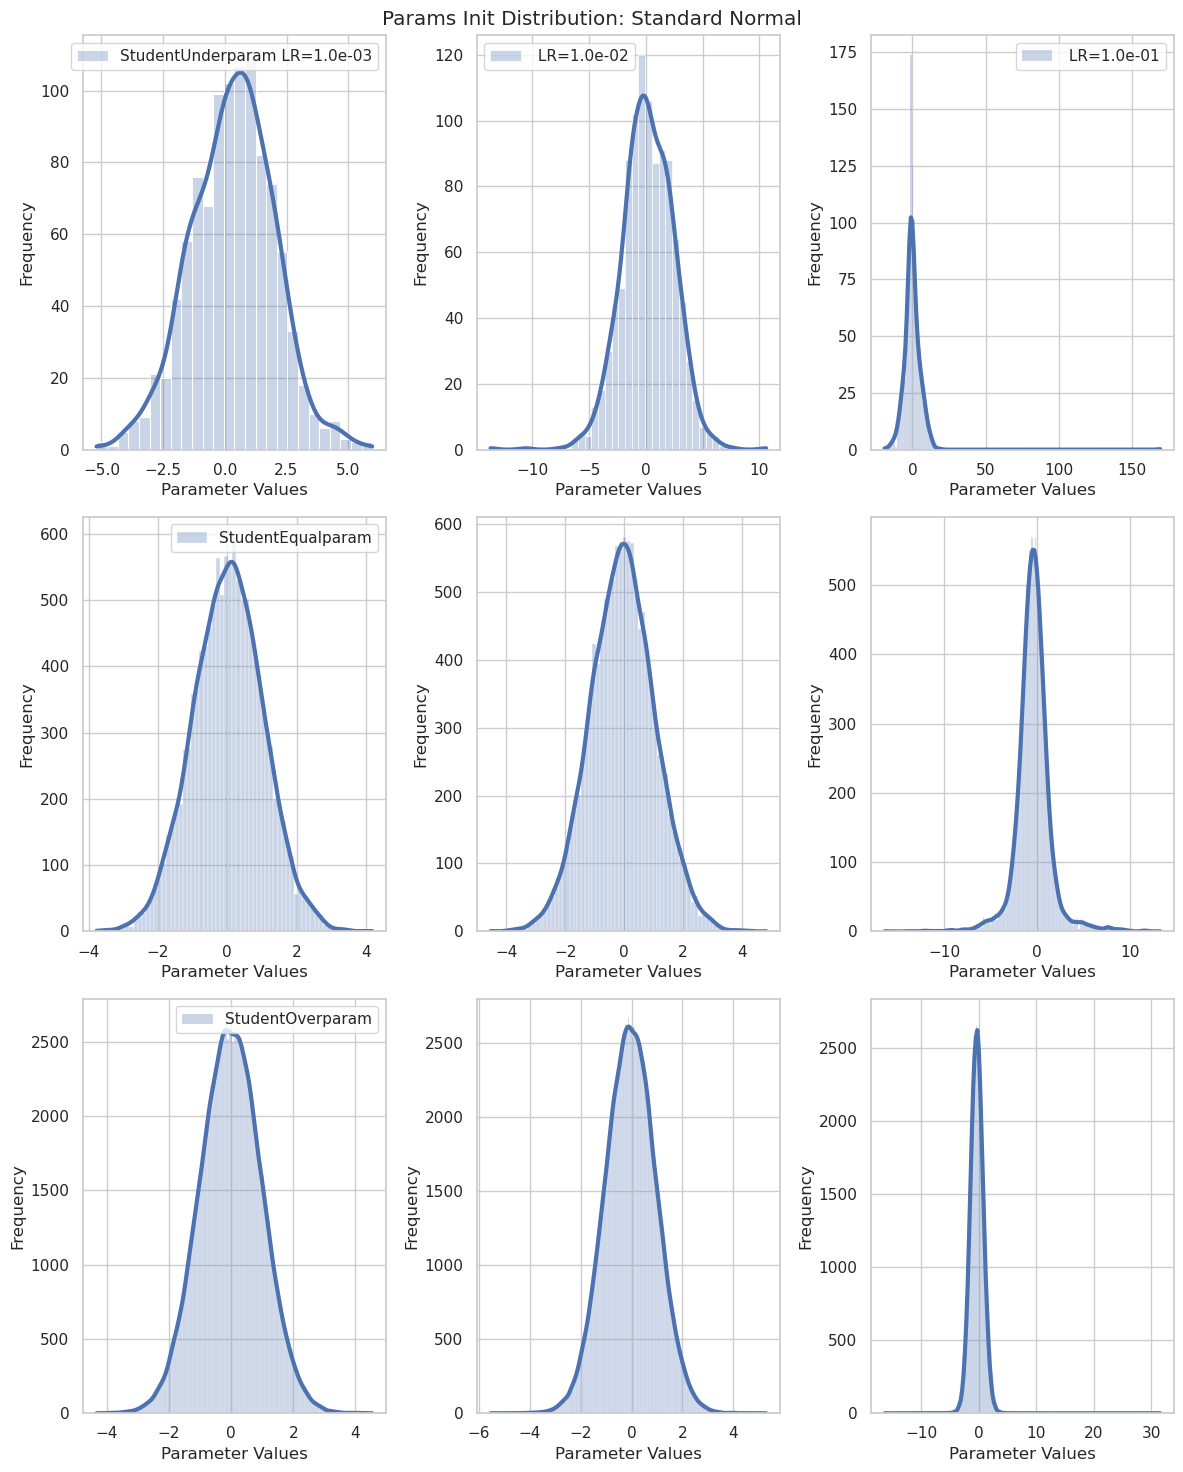

Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.001_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.01_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.1_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.001_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.01_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.1_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentoverparam_s42_niter10

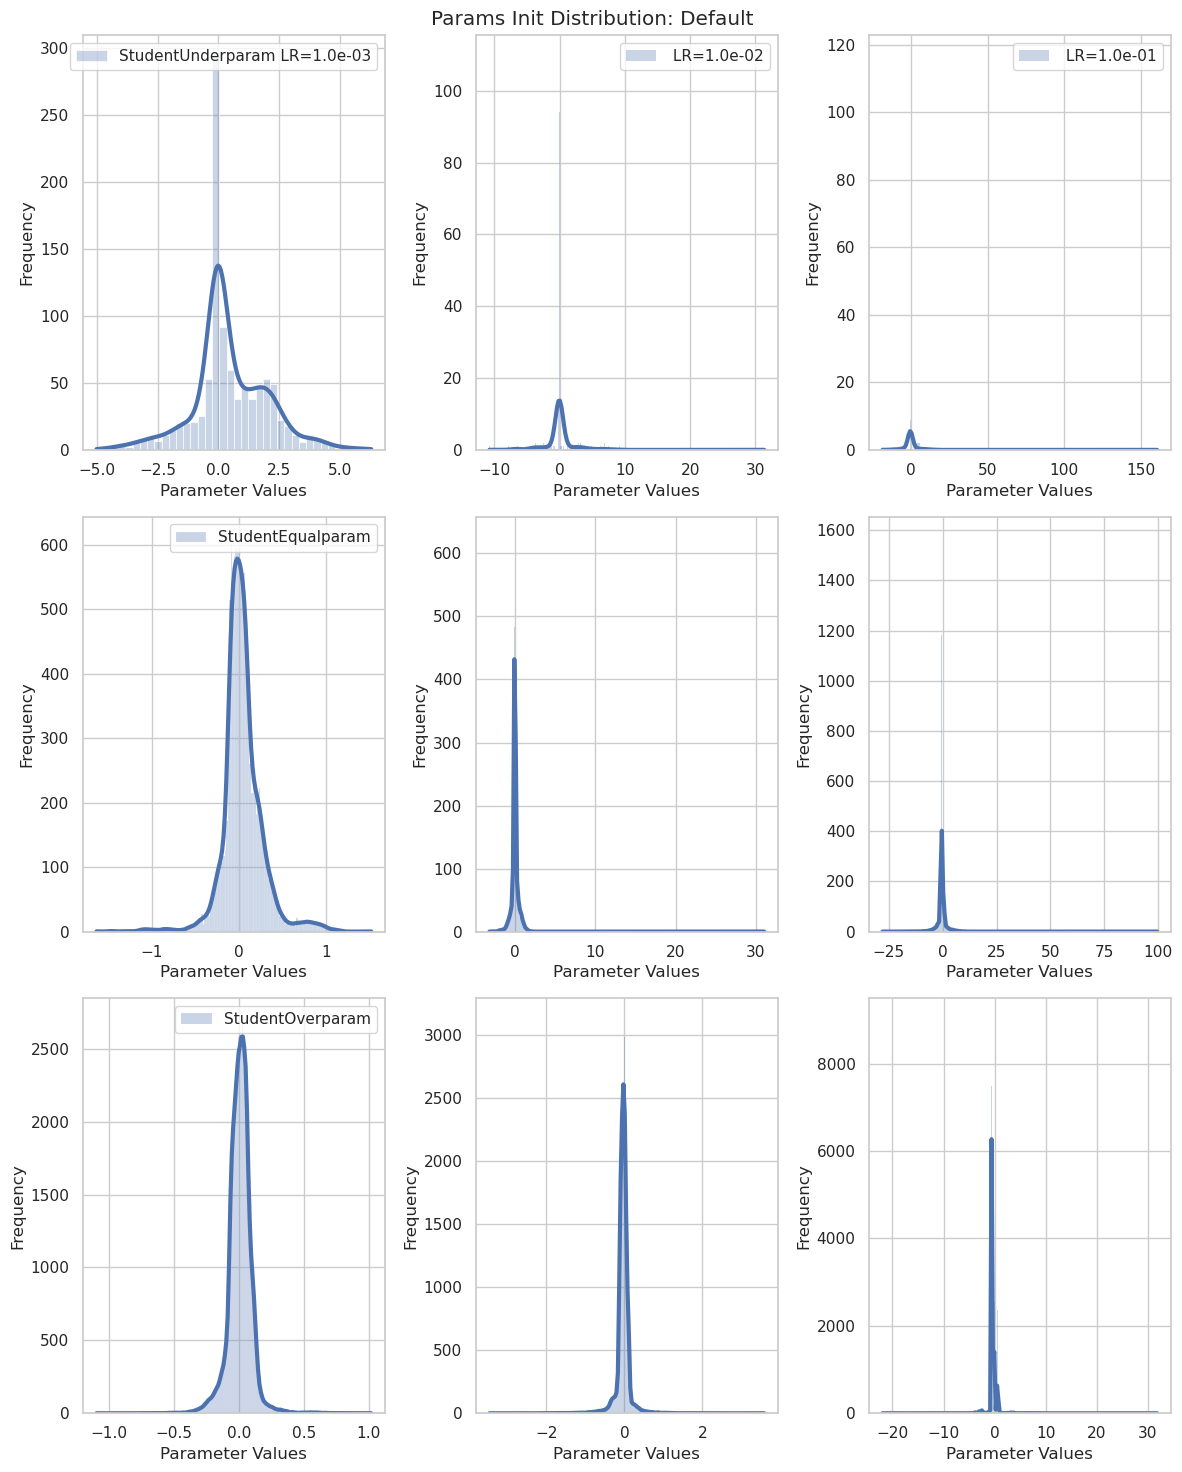

In [53]:
# Define distributions
distributions = ["standard_normal", "None"]

# Iterate over each distribution
for distribution in distributions:
    # Correct model filtering conditions
    underparam_models = [model.replace(".safetensors", "") for model in models_filenames if "underparam" in model and distribution in model]
    equalparam_models = [model.replace(".safetensors", "") for model in models_filenames if "equalparam" in model and distribution in model]
    overparam_models = [model.replace(".safetensors", "") for model in models_filenames if "overparam" in model and distribution in model]

    # Sort the model lists
    underparam_models.sort()
    equalparam_models.sort()
    overparam_models.sort()

    # Set Seaborn style
    sns.set(style="whitegrid")

    # Create a 3x3 grid of subplots
    fig, axes = plt.subplots(3, 3, figsize=(12, 15))

    # Define student types
    student_types = list(students.keys())  # Ensure correct student ordering
    student_models = [underparam_models, equalparam_models, overparam_models]

    for idx_student, (student_name, filenames) in enumerate(zip(student_types, student_models)):
        for idx_lr, filename in enumerate(filenames):
            lr, distribution_param = extract_lr_and_distribution(filename)

            # Ensure subplot index does not go out of bounds
            if idx_lr >= 3:
                continue  # Skip extra files to keep the 3x3 layout

            student_model = load_model(students[student_name], filename)

            params = get_global_params(student_model)

            # Select correct subplot
            ax = axes[idx_student, idx_lr]

            # Corrected label definition
            label = ""
            if idx_lr == 0:
                label += f"{student_name}"
            if idx_student == 0:
                label += f" LR={lr:.1e}"

            # Plot the histogram
            sns.histplot(params, label=label, alpha=0.3, kde=True,
                         line_kws={"linewidth": 3}, ax=ax)

            # Configure the plot
            ax.set_xlabel("Parameter Values")
            ax.set_ylabel("Frequency")

            # Add legend if required
            if idx_student == 0 or idx_lr == 0:
                ax.legend()

    # Set overall title
    distribution_title = "Standard Normal" if distribution == "standard_normal" else "Default"
    plt.suptitle(f"Params Init Distribution: {distribution_title}")

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()


In [95]:
def plot_param_distributions(models_filenames,
                             teacher_model,
                             students,
                             share_y_axis=True, 
                             distribution="standard_normal", 
                             save_fig=False, 
                             fig_name="global_params"):
    """
    Plots a 1x3 histogram for each distribution, grouping models by learning rate.

    Args:
    - models_filenames (list of str): List of model filenames.
    - teacher_model (Model): The teacher model.
    - students (dict): Dictionary of student models.
    - share_y_axis (bool): Whether to share the Y-axis across subplots.
    - distribution (str): The distribution to filter models by.
    - save_fig (bool): Whether to save the figure to disk.
    """
    
    # Filter models based on the distribution
    underparam_models = [model.replace(".safetensors", "") for model in models_filenames if "underparam" in model and distribution in model]
    equalparam_models = [model.replace(".safetensors", "") for model in models_filenames if "equalparam" in model and distribution in model]
    overparam_models = [model.replace(".safetensors", "") for model in models_filenames if "overparam" in model and distribution in model]

    # Combine all models
    all_models = underparam_models + equalparam_models + overparam_models

    # Extract unique learning rates from all models
    unique_lrs = sorted(set(extract_lr_and_distribution(model)[0] for model in all_models))

    # Set Seaborn style
    sns.set(style="whitegrid")

    # Create a 1x3 grid of subplots (one for each learning rate)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=share_y_axis)

    # Ensure axes is always iterable (even if sharey=False returns a single axis object)
    if len(unique_lrs) == 1:
        axes = [axes]

    # Define colors for each model type
    students_names = list(students.keys())
    colors = ["blue", "green", "red"]
    model_colors = {student_name: colors[idx] for idx, student_name in enumerate(students_names)}
    
    for idx_lr, lr in enumerate(unique_lrs):
        ax = axes[idx_lr]  # Select the subplot for this LR value

        # Iterate over each model type and plot them in the same subplot
        for student_name, model_list in zip(students_names, 
                                            [underparam_models, equalparam_models, overparam_models]):

            # Filter models that match this learning rate
            matching_models = [model for model in model_list if extract_lr_and_distribution(model)[0] == lr]

            # Load and plot each model
            for filename in matching_models:
                student_model = load_model(students[student_name], filename)
                params = get_global_params(student_model)

                # Plot the histogram with KDE
                sns.histplot(params, label=student_name if idx_lr == 0 else None, 
                                alpha=0.3, kde=True, line_kws={"linewidth": 2},
                                ax=ax, color=model_colors[student_name])
                
        sns.histplot(get_global_params(teacher_model), label="Teacher", alpha=0.3, kde=True, 
                     line_kws={"linewidth": 2, "linestyle": "--"}, ax=ax, color="orange")

        # Set the title to the learning rate value
        ax.set_title(f"LR = {lr:.1e}")
        ax.set_xlabel("Parameter Values")

        # If not sharing y-axis, set individual labels
        if not share_y_axis:
            ax.set_ylabel("Frequency")

    # If sharing y-axis, set a common label
    if share_y_axis:
        axes[0].set_ylabel("Frequency")

    # Add legend to the first subplot only
    axes[0].legend(title="Model Type")

    # Set overall title
    distribution_title = "Standard Normal" if distribution == "standard_normal" else "Default"
    plt.suptitle(f"Init Parameter Distribution :{distribution_title}")

    plt.tight_layout()

    # Save or show
    if save_fig:
        filepath = FIGURES_DIR / f"{fig_name}.png"
        plt.savefig(filepath, bbox_inches="tight", dpi=300)
        print(f"Figure saved at: {filepath}")
        plt.close()
    else:
        plt.show()

In [96]:
plot_param_distributions(models_filenames,
                         teacher_model,
                         students,
                         share_y_axis=True, 
                         distribution="standard_normal",
                         fig_name="global_params_standard_normal_dist_init",
                         save_fig=True,)


Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.001_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.001_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentoverparam_s42_niter10000_lr0.001_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.01_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.01_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentoverparam_s42_niter10000_lr0.01_standard_normal.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedD

In [97]:
plot_param_distributions(models_filenames,
                         teacher_model,
                         students,
                         share_y_axis=False, 
                         distribution="None",
                         fig_name="global_params_default_dist_init",
                         save_fig=True,)


Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.001_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.001_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentoverparam_s42_niter10000_lr0.001_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter10000_lr0.01_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentequalparam_s42_niter10000_lr0.01_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentoverparam_s42_niter10000_lr0.01_None.safetensors
Model loaded from /home/l11/Documents/adl/AdvancedDeepLearning-UniTS/challenges/02/models/studentunderparam_s42_niter